In [ ]:
## https://www.youtube.com/watch?v=9Dur_oUMGG8&list=PLZ8REt5zt2Pn0vfJjTAPaDVSACDvnuGiG&index=6&ab_channel=RingaTech

# Crear carpeta para subir las imagenes
!mkdir cuchillos
!mkdir cucharas
!mkdir tenedores

In [ ]:
# Entrar en cada carpeta y descomprimir el archivo zip
%cd cuchillos
!unzip Cuchillo.zip
%cd ..

%cd tenedores
!unzip Tenedor.zip
%cd ..

%cd cucharas
!unzip Cuchara.zip
%cd ..

In [ ]:
# Mostrar cuantas imagenes hay de cada categoria
!ls /cucharas | wc -l
!ls /cuchillos | wc -l
!ls /tenedores | wc -l

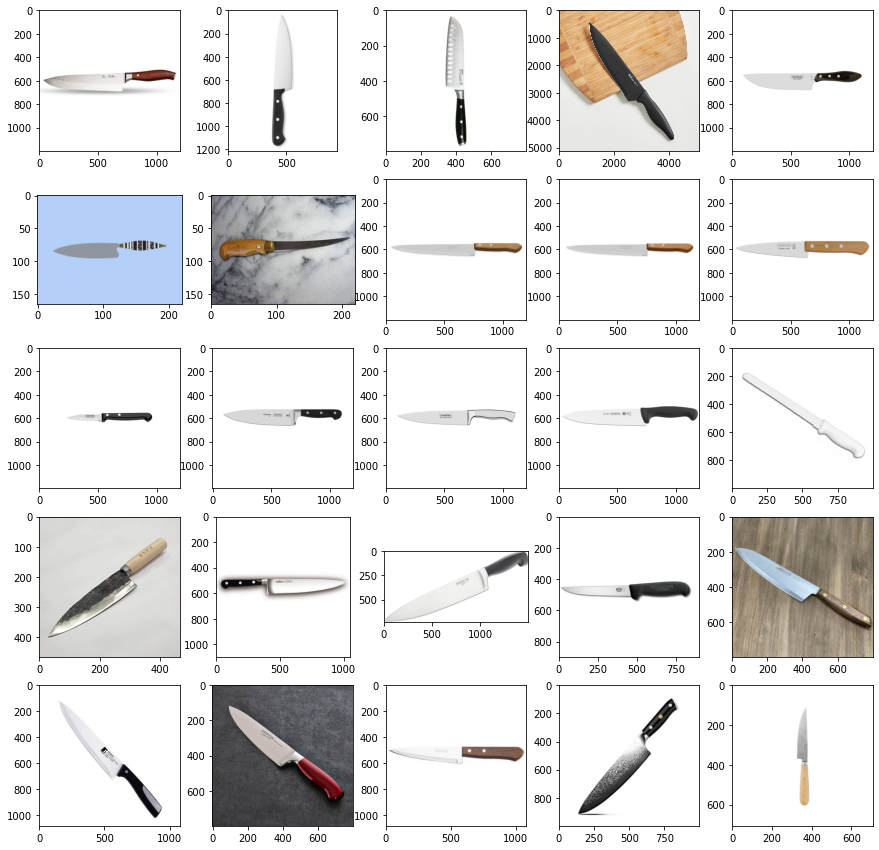

In [7]:
# Mostrar algunas imagenes de las carpetas
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '.\cuchillos\\'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
    plt.subplot(5,5,i+1)
    imagen = mpimg.imread(carpeta + nombreimg)
    plt.imshow(imagen)

In [14]:
## Forma para no cargar todos los datos de una en la memoria

# Crear carpetas para hacer el set de datos

!mkdir dataset
!mkdir dataset\cuchillo
!mkdir dataset\tenedor
!mkdir dataset\cuchara

In [15]:
# Copiar imagenes a la carpeta del dataset
# Limitar para que todas tengan la misma cantidad de imagenes
# Maximo 170 (el numero menor de imagenes)

import shutil
carpeta_fuente = '.\\cuchillos'
carpeta_destino = '.\\dataset\\cuchillo'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
    if i < 170:
        # Copia de la carpeta fuente a la carpeta destino
        shutil.copy(carpeta_fuente + '\\' + nombreimg, carpeta_destino + '\\' + nombreimg)


In [16]:
import shutil
carpeta_fuente = '.\\tenedores'
carpeta_destino = '.\\dataset\\tenedor'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
    if i < 170:
        # Copia de la carpeta fuente a la carpeta destino
        shutil.copy(carpeta_fuente + '\\' + nombreimg, carpeta_destino + '\\' + nombreimg)


In [17]:
import shutil
carpeta_fuente = '.\\cucharas'
carpeta_destino = '.\\dataset\\cuchara'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
    if i < 170:
        # Copia de la carpeta fuente a la carpeta destino
        shutil.copy(carpeta_fuente + '\\' + nombreimg, carpeta_destino + '\\' + nombreimg)


Found 408 images belonging to 3 classes.
Found 101 images belonging to 3 classes.


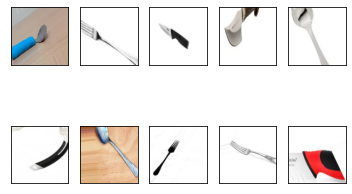

In [18]:
# Importar el geenerador con aumento de datos
# Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Crear el dataset del generador #Normalizacion de las imagenes
datagen = ImageDataGenerator(
    rescale = 1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split = 0.2 # 20% para pruebas
)

#Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory('.\\dataset', target_size = (224,224),
                                                     batch_size = 32, shuffle = True, subset = 'training')
data_gen_pruebas = datagen.flow_from_directory('.\\dataset', target_size = (224,224),
                                                     batch_size = 32, shuffle = True, subset = 'validation')

# Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(imagen[i])
    break
plt.show()



In [19]:
# sitio donde estan los modelos preentrenados
# https://tfhub.dev/
# Modelo seleccionado
# https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4
# Modelo sin la ultima capa
# https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4

import tensorflow as tf
import tensorflow_hub as hub

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
# Utilizamos la funcion para importar el modelo, se especifica la forma de entrada del modelo
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3)) # esta se puede usar como una capa cualquiera en un modelo de tensorflow


In [20]:
# Congelar modelo descargado, es decir, congelar todos sus pesos
mobilenetv2.trainable = False

In [21]:
modelo = tf.keras.Sequential([
    mobilenetv2, # agregamos el modelo descargado
    tf.keras.layers.Dense(3, activation='softmax')
])

modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [22]:
# Compilamos el modelo

modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [23]:
# Entrenamos el modelo
EPOCAS = 50

historial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32, 
    validation_data=data_gen_pruebas
)


Epoch 1/50
13/13 [==============================] - ETA: 0s - loss: 0.9639 - accuracy: 0.5392

C:\Python310\lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


13/13 [==============================] - 24s 2s/step - loss: 0.9639 - accuracy: 0.5392 - val_loss: 0.6553 - val_accuracy: 0.7129
Epoch 2/50
13/13 [==============================] - 16s 1s/step - loss: 0.5310 - accuracy: 0.8211 - val_loss: 0.4519 - val_accuracy: 0.8218
Epoch 3/50
13/13 [==============================] - 15s 1s/step - loss: 0.4120 - accuracy: 0.8578 - val_loss: 0.3121 - val_accuracy: 0.9208
Epoch 4/50
13/13 [==============================] - 16s 1s/step - loss: 0.3491 - accuracy: 0.8922 - val_loss: 0.3799 - val_accuracy: 0.8614
Epoch 5/50
13/13 [==============================] - 16s 1s/step - loss: 0.3423 - accuracy: 0.8946 - val_loss: 0.2965 - val_accuracy: 0.8911
Epoch 6/50
13/13 [==============================] - 17s 1s/step - loss: 0.2971 - accuracy: 0.9093 - val_loss: 0.2323 - val_accuracy: 0.9406
Epoch 7/50
13/13 [==============================] - 16s 1s/step - loss: 0.2372 - accuracy: 0.9240 - val_loss: 0.3251 - val_accuracy: 0.8713
Epoch 8/50
13/13 [=============

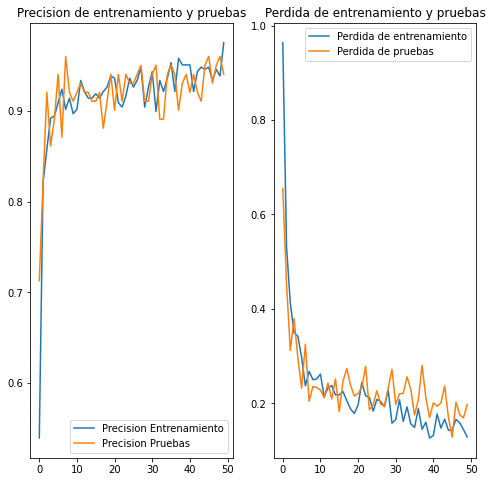

In [24]:
# Graficas de presicion
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(50)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precision Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precision Pruebas')
plt.legend(loc='lower right')
plt.title('Precision de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Perdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Perdida de pruebas')
plt.legend(loc='upper right')
plt.title('Perdida de entrenamiento y pruebas')

plt.show()

In [34]:
# Categorizar una imagen de internet
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
    respuesta = requests.get(url)
    img = Image.open(BytesIO(respuesta.content))
    img = np.array(img).astype(float)/255

    img = cv2.resize(img,(224,224))

    print ("begin prediction")

    prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
    return np.argmax(prediccion[0], axis=-1)

In [47]:
#0 = cuchara, 1 = cuchillo, 2 = tenedor
# url = 'https://th.bing.com/th/id/R.e44940120b7b67680af246c3b3e936f2?rik=XZPLfxf4nHlzyw&pid=ImgRaw&r=0' #debe ser 2
# url = 'https://http2.mlstatic.com/D_NQ_NP_849130-MCO45458863289_042021-O.webp' #debe ser 2
# url = 'https://i.pinimg.com/564x/a5/da/bc/a5dabc952c44f4f5ebd61f2207b40e66.jpg' #debe ser 0
# url = 'https://i.pinimg.com/564x/1a/3c/e6/1a3ce6f96eb181bc776e6f3dbd3de65f.jpg' #debe ser 0
# url = 'https://i.pinimg.com/564x/99/1b/4a/991b4a2db20335d592451e3616ef2bf9.jpg' #debe ser 1
# url = 'https://i.pinimg.com/564x/32/6b/8f/326b8fa4a359c07c3f3cc249a4c73ad2.jpg' #debe ser 1

# url = 'https://tse3.mm.bing.net/th?id=OIP.ZCz_SCM5cbUgWHjR5UHBUwHaDM&pid=Api&P=0&w=396&h=171' #debe ser 0
# url = 'https://tse2.mm.bing.net/th?id=OIP.8nVFxf9j99dKJoAB5oMZsgHaHa&pid=Api&P=0&w=175&h=175' #debe ser 1
url = 'https://tse3.mm.bing.net/th?id=OIP.NRCDGEHDW-CZejKKhLSigAHaFh&pid=Api&P=0&w=222&h=165' #debe ser 2

prediccion = categorizar (url)
print(prediccion)

begin prediction
2


In [41]:
#Crear la carpeta para exportarla a TF Serving
!mkdir -p carpeta_salida\modelo_cocina\1

In [42]:
#Guardar el modelo en formato SavedModel
modelo.save('carpeta_salida/modelo_cocina/1')

INFO:tensorflow:Assets written to: carpeta_salida/modelo_cocina/1\assets


INFO:tensorflow:Assets written to: carpeta_salida/modelo_cocina/1\assets
